In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
csv_file_path = r'C:\Users\deepi\Desktop\mental health\student.csv'
df = pd.read_csv(csv_file_path)
df.shape

(1100, 21)

In [43]:
def map_values(value):
    if 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:
        return value

# Apply mapping for anxiety_level and depression
df['anxiety_level'] = df['anxiety_level'].apply(map_values)
df['depression'] = df['depression'].apply(map_values)

# Apply mapping for self_esteem (range 1 to 30)
df['self_esteem'] = df['self_esteem'].apply(lambda x: min(5, max(1, (x-1) // 5 + 1)))

# Display the updated dataframe
print(df)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                 3            4                      0           3         2   
1                 3            2                      1           3         5   
2                 3            4                      1           3         2   
3                 4            3                      1           3         4   
4                 4            5                      0           2         2   
...             ...          ...                    ...         ...       ...   
1095              3            4                      0           3         3   
1096              2            3                      0           2         0   
1097              1            5                      0           1         1   
1098              5            1                      1           4         5   
1099              4            2                      1           3         3   

      blood_pressure  sleep

In [44]:
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs','future_career_concerns','social_support']]

In [45]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['mental_health_cluster'] = kmeans.fit_predict(scaled_features)

In [47]:
cluster_names = {0: 'High', 1: 'Low', 2: 'Medium'}
df['cluster_label'] = df['mental_health_cluster'].map(cluster_names)

In [48]:
cluster_counts = df['cluster_label'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)


Cluster Distribution:
Medium    421
High      371
Low       308
Name: cluster_label, dtype: int64


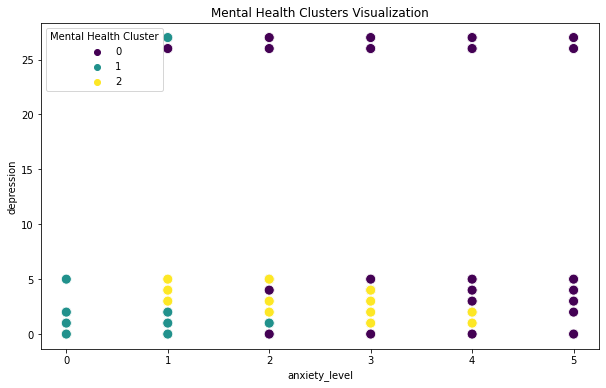

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features (you can choose any two features for visualization)
feature1 = 'anxiety_level'
feature2 = 'depression'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='mental_health_cluster', data=df, palette='viridis', s=100)
plt.title('Mental Health Clusters Visualization')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Mental Health Cluster')
plt.show()

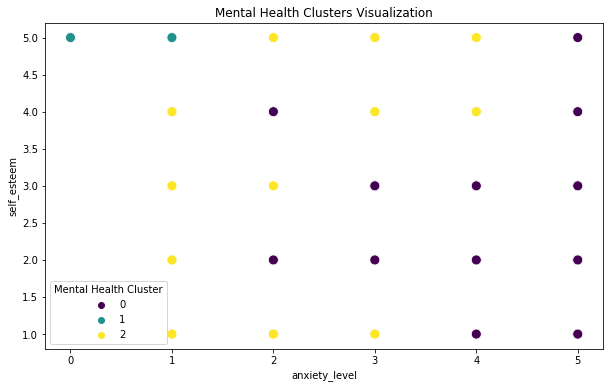

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features (you can choose any two features for visualization)
feature1 = 'anxiety_level'
feature2 = 'self_esteem'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='mental_health_cluster', data=df, palette='viridis', s=100)
plt.title('Mental Health Clusters Visualization')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Mental Health Cluster')
plt.show()

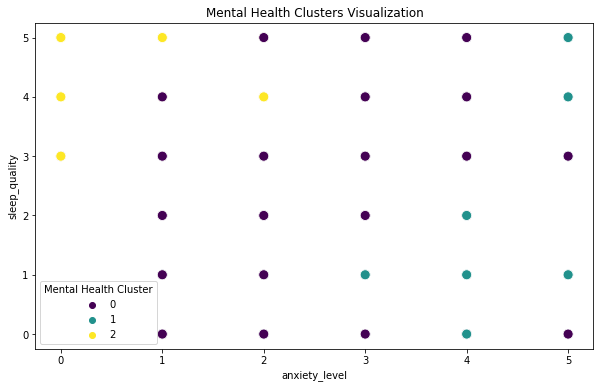

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features (you can choose any two features for visualization)
feature1 = 'anxiety_level'
feature2 = 'sleep_quality'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='mental_health_cluster', data=df, palette='viridis', s=100)
plt.title('Mental Health Clusters Visualization')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Mental Health Cluster')
plt.show()

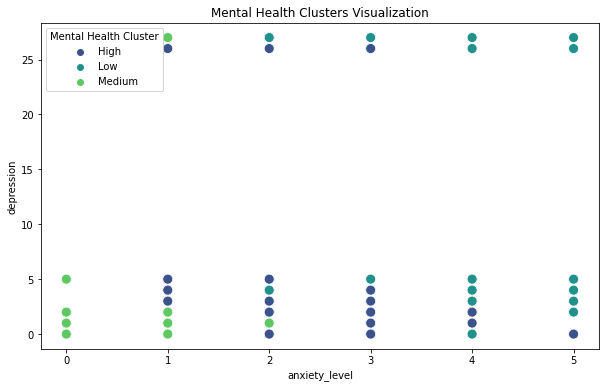

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'mental_health_cluster' column has been created using the previous code

# Map cluster labels to meaningful names
cluster_names = {0: 'High', 1: 'Low', 2: 'Medium'}
df['cluster_label'] = df['mental_health_cluster'].map(cluster_names)

# Scatter plot of two features with cluster labels
feature1 = 'anxiety_level'
feature2 = 'depression'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='cluster_label', data=df, palette='viridis', s=100)
plt.title('Mental Health Clusters Visualization')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Mental Health Cluster')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Assuming 'scaled_features' and 'mental_health_cluster' columns are already available

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, df['mental_health_cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4110122981126197



# hierarchial clustering


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

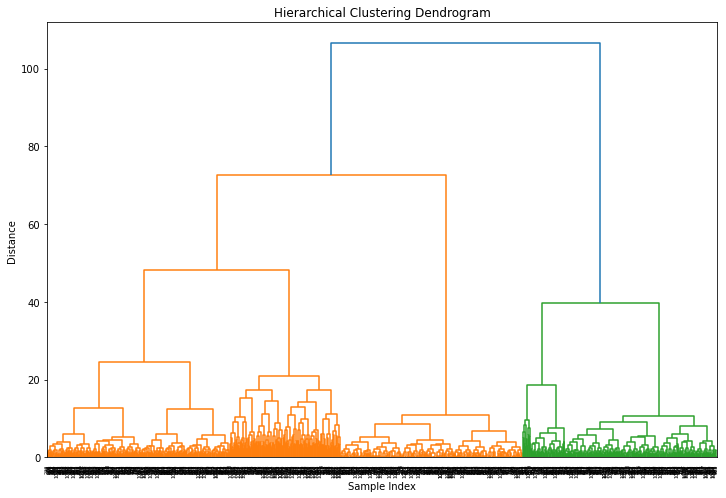

In [18]:
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 
                                'future_career_concerns', 'social_support']]

# Scale the features if needed
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform hierarchical clustering using linkage function
linkage_matrix = linkage(scaled_features, method='ward', metric='euclidean')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [20]:
distance_threshold = 15  # Adjust as needed
cluster_assignments = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.39944386334933296


# DBSCAN

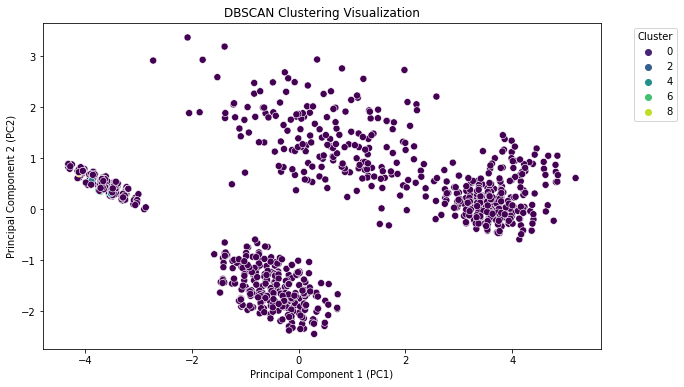

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs',  
                                'future_career_concerns', 'social_support'
                                ]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust these parameters
cluster_assignments = dbscan.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

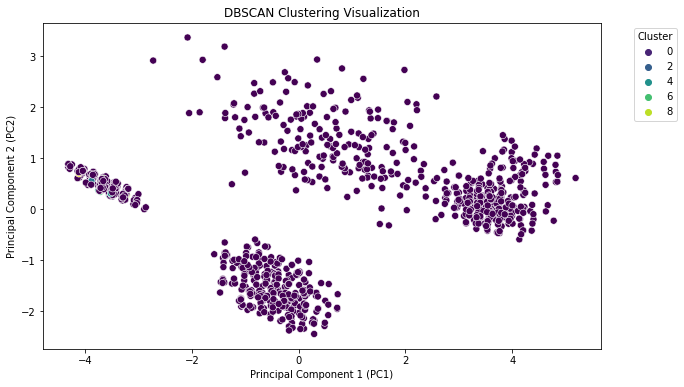

In [22]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns  # Don't forget to import seaborn

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 'future_career_concerns', 'social_support']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_assignments = dbscan.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


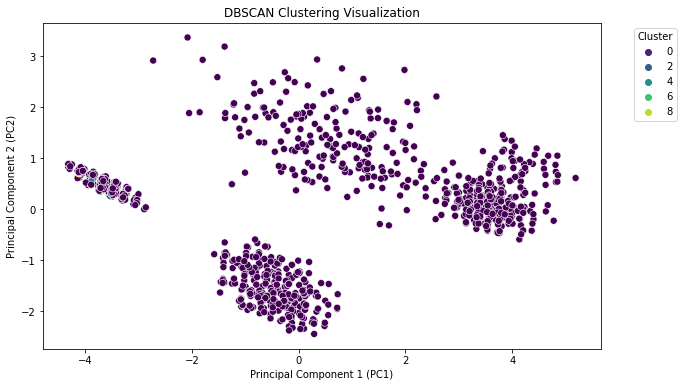

In [23]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 'future_career_concerns', 'social_support']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust these parameters
cluster_assignments = dbscan.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
# import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs',  
                                'future_career_concerns', 'social_support'
                                ]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust these parameters
cluster_assignments = dbscan.fit_predict(scaled_features)


# Filter out noise points (cluster assignment -1) for silhouette score calculation
valid_clusters = cluster_assignments != -1

# Check if there are any valid clusters before calculating the silhouette score
if any(valid_clusters):
    silhouette_avg = silhouette_score(scaled_features[valid_clusters], cluster_assignments[valid_clusters])
    print("Silhouette Score for DBSCAN:", silhouette_avg)
else:
    print("No valid clusters found.")

Silhouette Score for DBSCAN: 0.8622371472808038


# MEAN SHIFT

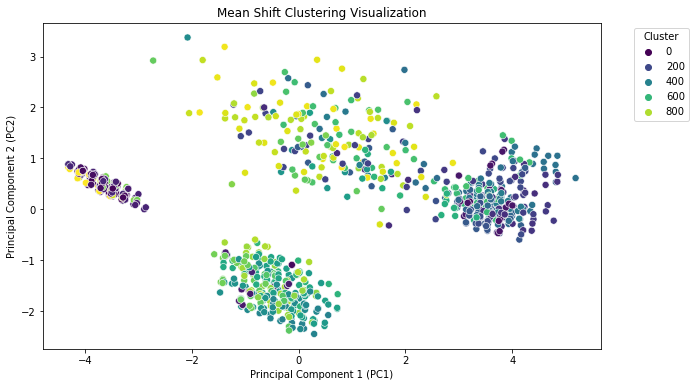

In [25]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs',  
                                'future_career_concerns', 'social_support'
                                ]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Mean Shift clustering
meanshift = MeanShift(bandwidth=0.5)  # You may need to adjust the bandwidth parameter
cluster_assignments = meanshift.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('Mean Shift Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [26]:
# Count the number of unique clusters identified by Mean Shift
unique_clusters = pd.Series(cluster_assignments).unique()

# Print the number of clusters
print("Number of Clusters:", len(unique_clusters))

Number of Clusters: 908


# agglomerative clustering

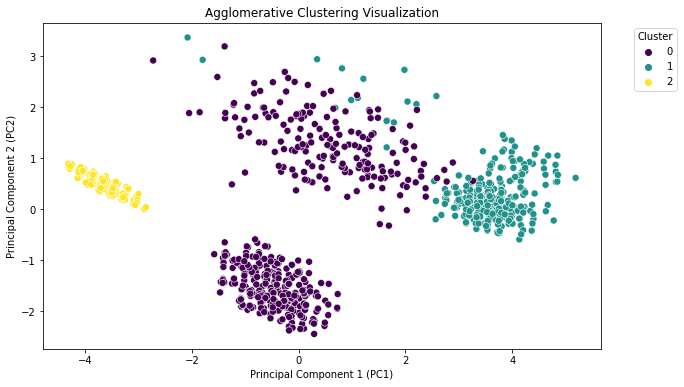

In [27]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs',  
                                'future_career_concerns', 'social_support'
                                ]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You may need to adjust the number of clusters
cluster_assignments = agglomerative.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [28]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs',  
                                'future_career_concerns', 'social_support'
                                ]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You may need to adjust the number of clusters
cluster_assignments = agglomerative.fit_predict(scaled_features)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, cluster_assignments)
print("Silhouette Score for Agglomerative Clustering:", silhouette_avg)


Silhouette Score for Agglomerative Clustering: 0.3635045082770321


Enter the value for anxiety_level: 21
Enter the value for self_esteem: 12
Enter the value for mental_health_history: 3
Enter the value for depression: 12
Enter the value for headache: 3
Enter the value for blood_pressure: 2
Enter the value for sleep_quality: 1
Enter the value for breathing_problem: 2
Enter the value for noise_level: 1
Enter the value for living_conditions: 3
Enter the value for safety: 1
Enter the value for basic_needs: 2
Enter the value for future_career_concerns: 3
Enter the value for social_support: 1


C:\Users\deepi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The user input belongs to Cluster 0.


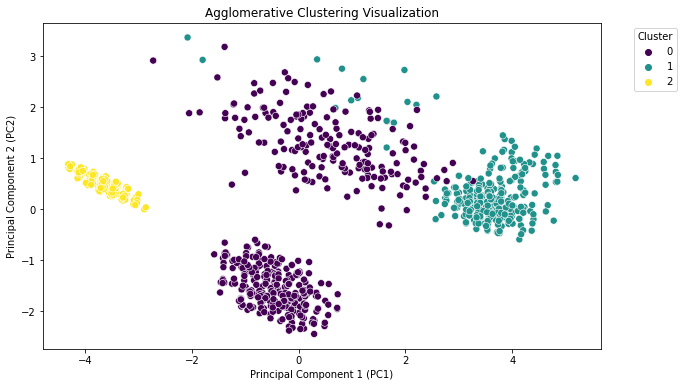

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 'future_career_concerns', 'social_support']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You may need to adjust the number of clusters
cluster_assignments = agglomerative.fit_predict(scaled_features)

# Input features from the user
user_input = []
for feature in features_for_clustering.columns:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)

# Repeat the user input to create multiple samples
num_samples = 10  # Adjust as needed
user_inputs = np.tile(user_input, (num_samples, 1))

# Scale the user input
scaled_user_inputs = scaler.transform(user_inputs)

# Predict the cluster for the user input using fit_predict
user_clusters = agglomerative.fit_predict(scaled_user_inputs)

# Display the result
print(f"The user input belongs to Cluster {user_clusters[0]}.")

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Enter the value for anxiety_level: 5
Enter the value for self_esteem: 5
Enter the value for mental_health_history: 5
Enter the value for depression: 5
Enter the value for headache: 5
Enter the value for blood_pressure: 5
Enter the value for sleep_quality: 5
Enter the value for breathing_problem: 5
Enter the value for noise_level: 5
Enter the value for living_conditions: 5
Enter the value for safety: 5
Enter the value for basic_needs: 5
Enter the value for future_career_concerns: 5
Enter the value for social_support: 5


C:\Users\deepi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The user input belongs to Cluster: low issue


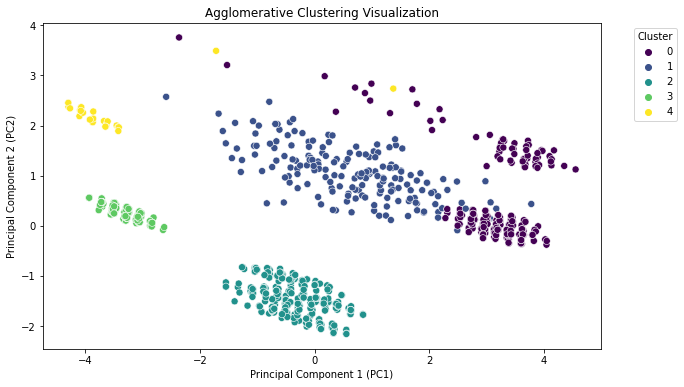

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def map_values(value):
    if 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:
        return value

# Apply mapping for anxiety_level and depression
df['anxiety_level'] = df['anxiety_level'].apply(map_values)
df['depression'] = df['depression'].apply(map_values)

# Apply mapping for self_esteem (range 1 to 30)
df['self_esteem'] = df['self_esteem'].apply(lambda x: min(5, max(1, (x-1) // 5 + 1)))

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 'future_career_concerns', 'social_support']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')  # You may need to adjust the number of clusters
cluster_assignments = agglomerative.fit_predict(scaled_features)

# Input features from the user
user_input = []
for feature in features_for_clustering.columns:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)

# Repeat the user input to create multiple samples
num_samples = 10  # Adjust as needed
user_inputs = np.tile(user_input, (num_samples, 1))

# Scale the user input
scaled_user_inputs = scaler.transform(user_inputs)

# Predict the cluster for the user input using fit_predict
user_clusters = agglomerative.fit_predict(scaled_user_inputs)

# Map cluster numbers to cluster names
cluster_names = {0: 'low issue', 1: 'high issue', 2: 'Mid Low', 3: 'Mid High', 4: 'Medium Issue'}

# Display the result
user_cluster_name = cluster_names[user_clusters[0]]
print(f"The user input belongs to Cluster: {user_cluster_name}")

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
